# CAR PRICE PREDICTION WITH MACHINE LEARNING 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\HP\Desktop\car data.csv") 
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.duplicated().sum()

2

In [6]:
features = ['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission']
target = 'Selling_Price'

In [7]:
X = df[features]
y = df[target]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Preprocessing pipeline for categorical features
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']

In [10]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [12]:
# Initialize and train a Linear Regression model within a pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [13]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Fuel_Type', 'Selling_type',
                                                   'Transmission'])])),
                ('regressor', LinearRegression())])

In [14]:
predictions = model.predict(X_test)

In [15]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 11.037822013885808
Mean Absolute Error: 2.1792346035504604


In [16]:
# Example prediction for a new data point
new_data_point = pd.DataFrame({
    'Year': [2015],
    'Present_Price': [8.0],
    'Driven_kms': [60000],
    'Fuel_Type': ['Petrol'],
    'Selling_type': ['Dealer'],
    'Transmission': ['Manual']
})
predicted_price = model.predict(new_data_point)
print(f"Predicted Price: {predicted_price}")

Predicted Price: [4.67263199]


# DATA VISUALIZATION


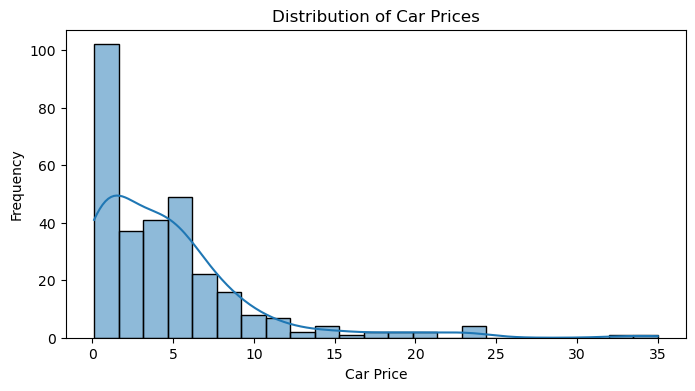

In [17]:
plt.figure(figsize=(8,4))
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Car Price')
plt.ylabel('Frequency')
plt.show()

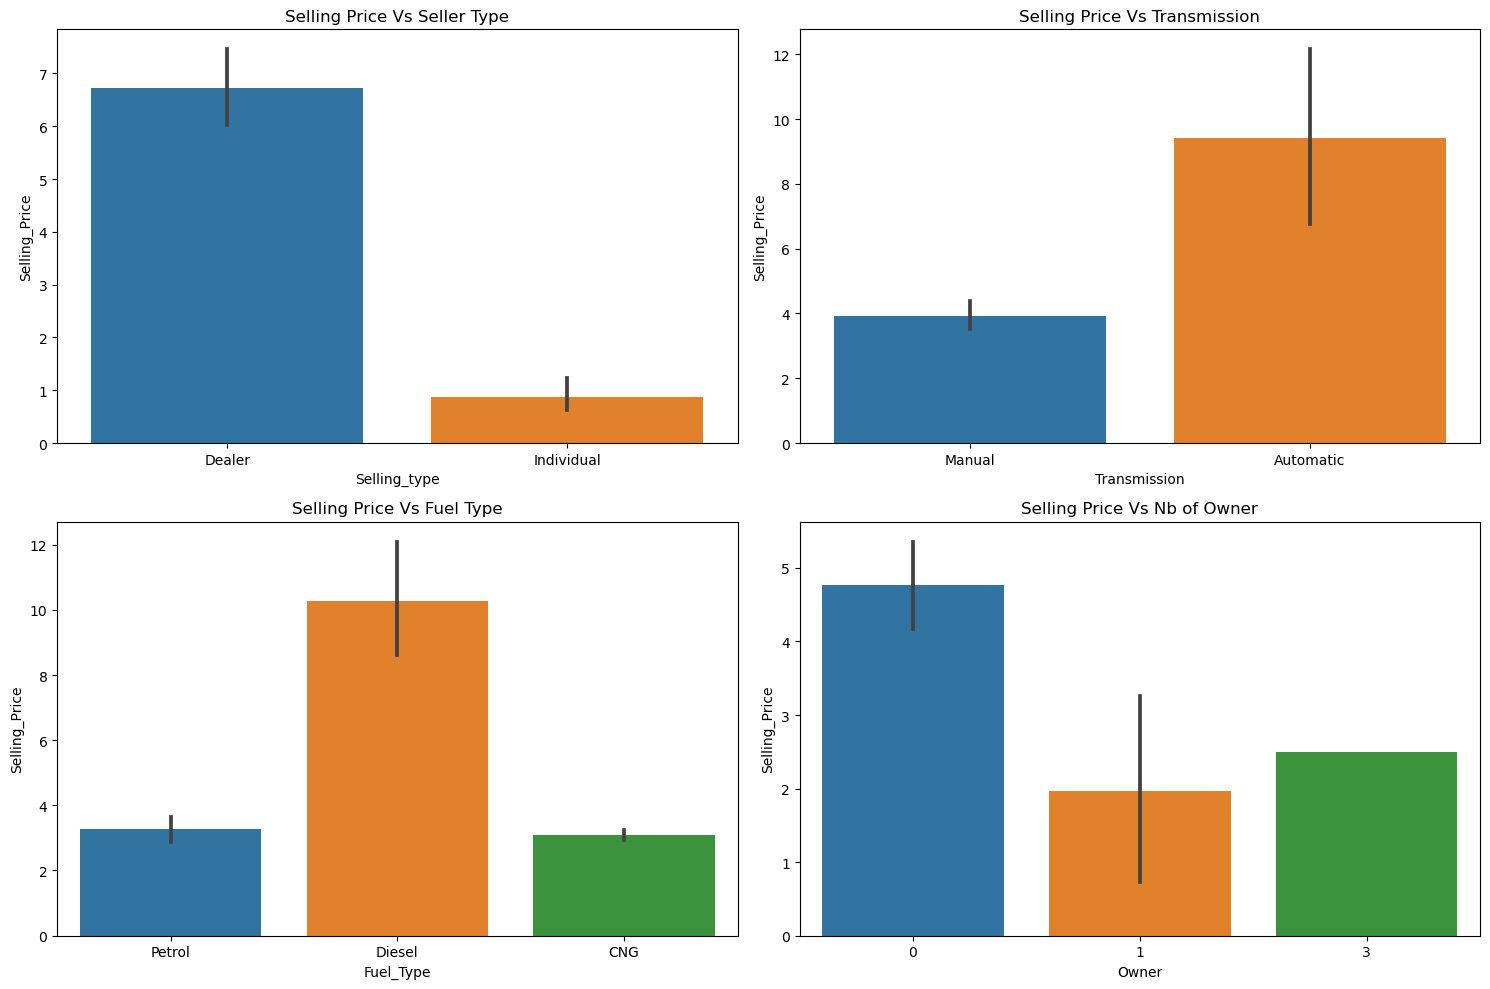

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(data=df,x='Selling_type',y='Selling_Price') 
plt.title('Selling Price Vs Seller Type')

plt.subplot(2,2,2)
sns.barplot(data=df, x='Transmission', y='Selling_Price') 
plt.title('Selling Price Vs Transmission')

plt.subplot(2,2,3)
sns.barplot(data=df,x='Fuel_Type',y='Selling_Price') 
plt.title('Selling Price Vs Fuel Type')

plt.subplot(2,2,4)
sns.barplot(data=df,x='Owner',y='Selling_Price') 
plt.title('Selling Price Vs Nb of Owner')
plt.tight_layout()
plt.show()